# Week-2

#### 1. Implement AND and OR logic operations using a single perceptron, and verify the correctness of the output using appropriate truth tables. (linear Data)


In [2]:
import numpy as np

# Step activation function
def step(x):
    return 1 if x >= 0 else 0

class Perceptron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def predict(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return step(total)

In [3]:
# AND Gate
weights = np.array([1, 1])
bias = -1.5

and_gate = Perceptron(weights, bias)

print("AND Gate")
for x in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    print(x, "->", and_gate.predict(np.array(x)))

AND Gate
(0, 0) -> 0
(0, 1) -> 0
(1, 0) -> 0
(1, 1) -> 1


In [4]:
#OR Gate
weights = np.array([1,1])
bias = -0.5

or_gate = Perceptron(weights, bias)

print("OR Gate")
for x in [(0,0), (0,1), (1,0), [1,1]]:
    print(x, '->', or_gate.predict(np.array(x)))

OR Gate
(0, 0) -> 0
(0, 1) -> 1
(1, 0) -> 1
[1, 1] -> 1


#### 2. Examine the feasibility of implementing the XOR and XNOR (¬XOR) operations (Non linear data) using a single perceptron. If not possible, clearly explain the reason based on the concept of linear separability.1. 

In [21]:
class Perceptron:
    def __init__(self, learning_rate, epochs):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None
        self.activation_function = self.unit_function

    def unit_function(self,y):
        return np.where(y >= 0,1,0)

    def fit(self, X, y):
        _, n_parameters = X.shape
        self.weights = np.zeros(n_parameters)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_out = self.activation_function(linear_output)
                error = y[idx] - y_out
                update = error * self.learning_rate 
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)


X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0,1,1,0])

p = Perceptron(0.1,10)
p.fit(X, y)

# Predictions
pred = p.predict(X)
print("Predictions:", pred)
print("Weights:", p.weights)
print("Bias:", p.bias)      

Predictions: [1 1 0 0]
Weights: [-0.1  0. ]
Bias: 0.0


#### 3. Implement the XOR and (¬XOR) logic operation using a multi-perceptron network, and analyze how multiple perceptrons overcome the limitations of a single perceptron.


In [27]:
def step(x):
    return 1 if x >= 0 else 0

class XOR_Network:
    def __init__(self):
        # OR gate
        self.w_or = np.array([1, 1])
        self.b_or = -0.5

        # NAND gate
        self.w_nand = np.array([-1, -1])
        self.b_nand = 1.5

        # AND gate (final output)
        self.w_out = np.array([1, 1])
        self.b_out = -1.5


    def predict(self, x):
        h1 = step(np.dot(self.w_or, x) + self.b_or)      # OR
        h2 = step(np.dot(self.w_nand, x) + self.b_nand) # NAND
        
        return step(h1 + h2 + self.b_out)               # AND


xor_gate = XOR_Network()

print("XOR Gate")
for x in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    print(x, "->", xor_gate.predict(np.array(x)))

XOR Gate
(0, 0) -> 0
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 0


### 4. Demonstrate that the thresholding logic used by perceptron is very harsh.


In [29]:
import numpy as np

# Step activation function
def step(x):
    return 1 if x >= 0 else 0

class Perceptron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def predict(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return step(total)


p = Perceptron(weights=[1, 1], bias=-1)

test_inputs = [
    [0.49, 0.50],   # just below threshold
    [0.50, 0.50],   # exactly at threshold
    [0.51, 0.50]    # just above threshold
]

for x in test_inputs:
    total = np.dot(p.weights, x) + p.bias
    print(f"Input: {x}, Total: {total:.2f}, Output:", p.predict(x))


Input: [0.49, 0.5], Total: -0.01, Output: 0
Input: [0.5, 0.5], Total: 0.00, Output: 1
Input: [0.51, 0.5], Total: 0.01, Output: 1


#### 5. Implement the Perceptron Learning Algorithm and study the effect of weight updates on convergence for a binary decision problem such as determining whether a user would like to watch a movie.


**Note:** Consider a small dataset(design your own excel csv sheet) of movie records with Boolean or real-valued features, for example:

    - f1: Is actor Matt Damon present
    - f2: Is the genre Thriller
    - f3: Is the director Christopher Nolan
    - f4: IMDb rating (scaled between 0 and 1)



* The output label represents like (1) or dislike (0).
* Train the perceptron model using these features and observe how weight updates influence convergence and classification performance.


Test with a sample record to show whether a perceptron properly classifies it or not.
* i) Check with MP Perceptron  (without weights and bias)
* ii) Check with Perceptron (with weights)
* iii) Check with Perceptron (with weights and bias)



In [54]:
import pandas as pd
import numpy as np

path = "/kaggle/input/dataset-movies/movies.csv"
df = pd.read_csv(path)

X = df[["f1", "f2", "f3", "f4"]].values
y = df["y"].values

print("Features (X):")
print(X)

print("\nLabels (y):")
print(y)

Features (X):
[[0.   1.   1.   0.87]
 [0.   0.   1.   0.85]
 [1.   0.   0.   0.81]
 [1.   1.   0.   0.68]
 [0.   1.   1.   0.72]
 [0.   0.   0.   0.55]]

Labels (y):
[1 1 1 0 1 0]


In [55]:
def step(x):
    return 1 if x >= 0 else 0

def mp_perceptron(x):
    return step(np.sum(x))

def perceptron_no_bias(x, weights):
    return step(np.dot(weights, x))

def perceptron_with_bias(x, weights, bias):
    return step(np.dot(weights, x) + bias)

In [56]:
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=10):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    # Training using Perceptron Learning Algorithm
    def fit(self, X, y):
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):
            for i in range(len(X)):
                linear_output = np.dot(self.weights, X[i]) + self.bias
                y_pred = step(linear_output)
                error = y[i] - y_pred

                # Weight update
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

    # Prediction
    def predict(self, X):
        predictions = []
        for x in X:
            y_pred = step(np.dot(self.weights, x) + self.bias)
            predictions.append(y_pred)
        return predictions

In [59]:
test_movie = np.array([1, 1, 0, 0.75])

print("\nTest Movie:", test_movie)

print("\n(i) MP Perceptron (no weights, no bias):")
print("Prediction:", mp_perceptron(test_movie))

print("\n(ii) Perceptron (with weights, no bias):")
print("Prediction:", perceptron_no_bias(test_movie, weights))

p = Perceptron(learning_rate=0.1, epochs=10)
p.fit(X, y)

weights = p.weights
bias = p.bias

print("\n(iii) Perceptron (with weights and bias – CLASS):")
print("Prediction:", p.predict([test_movie])[0])


Test Movie: [1.   1.   0.   0.75]

(i) MP Perceptron (no weights, no bias):
Prediction: 1

(ii) Perceptron (with weights, no bias):
Prediction: 0

(iii) Perceptron (with weights and bias – CLASS):
Prediction: 0


In [53]:
print("\nPerceptron Learning Algorithm on Dataset:")
for i in range(len(X)):
    pred = p.predict([X[i]])[0]
    print(f"Input {X[i]} -> Predicted: {pred}, Actual: {y[i]}")


Perceptron Learning Algorithm on Dataset:
Input [0.   1.   1.   0.87] -> Predicted: 1, Actual: 1
Input [0.   0.   1.   0.85] -> Predicted: 1, Actual: 1
Input [1.   0.   0.   0.81] -> Predicted: 1, Actual: 1
Input [1.   1.   0.   0.68] -> Predicted: 0, Actual: 0
Input [0.   1.   1.   0.72] -> Predicted: 1, Actual: 1
Input [0.   0.   0.   0.55] -> Predicted: 0, Actual: 0


#### 6. Demonstrate the Representation Power of a Network of Perceptrons

- #### (a) How many Boolean functions can be designed using two binary inputs?
      - Ans - 2^(2^n)
- #### (b) For each Boolean function, determine whether it is linearly separable.
      - Linearly Seperable -> Learnable by a single perceptron
      - Non-Linearly Seperable -> Cannot be learned by a single perceptron 
- #### (c) Implement a single perceptron model and test whether it can correctly learn each Boolean function. (Mention how many it can't learn and why)
- #### (d) Extend the program to estimate or analyze how the number of non-linearly separable Boolean functions increases as the number of inputs n grows.



In [4]:
import itertools
import numpy as np

# -----------------------------
# Perceptron Implementation
# -----------------------------
class Perceptron:
    def __init__(self, lr=0.1, epochs=100):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = 0

        for _ in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                y_pred = self.predict(xi)
                update = self.lr * (yi - y_pred)
                self.w += update * xi
                self.b += update
                errors += abs(update)
            if errors == 0:
                return True  # perfectly learned
        return False  # failed to converge

    def predict(self, x):
        return 1 if np.dot(x, self.w) + self.b >= 0 else 0


# -----------------------------
# Generate Boolean Functions
# -----------------------------
def generate_boolean_functions(n):
    inputs = list(itertools.product([0, 1], repeat=n))
    functions = list(itertools.product([0, 1], repeat=len(inputs)))
    return np.array(inputs), functions


# -----------------------------
# Test Perceptron Capability
# -----------------------------
def test_perceptron(n):
    X, functions = generate_boolean_functions(n)
    learnable = 0
    not_learnable = 0

    for f in functions:
        y = np.array(f)
        p = Perceptron()
        if p.fit(X, y):
            learnable += 1
        else:
            not_learnable += 1

    return learnable, not_learnable, len(functions)


# -----------------------------
# (c) Test for 2 Inputs
# -----------------------------
learnable, not_learnable, total = test_perceptron(2)

print("For n = 2 inputs:")
print("Total Boolean functions:", total)
print("Linearly separable (learnable):", learnable)
print("Non-linearly separable:", not_learnable)
print("Example of non-linearly separable function: XOR")


# -----------------------------
# (d) Growth Analysis
# -----------------------------
print("\nGrowth of Non-Linearly Separable Functions:")
print("n | Total Functions | Non-Linearly Separable")
print("-------------------------------------------")

for n in range(1, 4):
    _, not_learnable, total = test_perceptron(n)
    print(f"{n} | {total:15} | {not_learnable}")


For n = 2 inputs:
Total Boolean functions: 16
Linearly separable (learnable): 14
Non-linearly separable: 2
Example of non-linearly separable function: XOR

Growth of Non-Linearly Separable Functions:
n | Total Functions | Non-Linearly Separable
-------------------------------------------
1 |               4 | 0
2 |              16 | 2
3 |             256 | 152


#### 7. Design and implement a Multi-Layer Perceptron (MLP) architecture capable of realizing all basic Boolean functions  
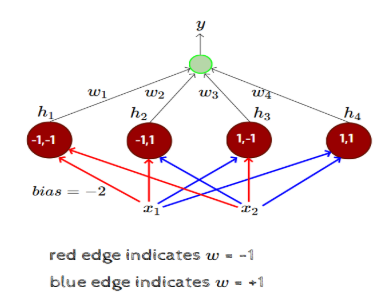

#### Hint: 

By finding the weights w1,w2,w3,w4 such that the truth table of any boolean function can be represented by this network. 
Also Each perceptron in the middle layer fires only for a specific input (and no two perceptrons fire for the same input)


In [5]:
import numpy as np

def step(x):
    return 1 if x >= 0 else 0

def hidden_layer(x):
    x1, x2 = x

    h1 = step(-x1 - x2 + 0.5)   # fires for (0,0)
    h2 = step(-x1 + x2 - 0.5)   # fires for (0,1)
    h3 = step(x1 - x2 - 0.5)    # fires for (1,0)
    h4 = step(x1 + x2 - 1.5)    # fires for (1,1)

    return np.array([h1, h2, h3, h4])


# MLP forward pass
def mlp(x, w):
    h = hidden_layer(x)
    y = step(np.dot(w, h) - 0.5)
    return y


inputs = [(0,0), (0,1), (1,0), (1,1)]

boolean_functions = {
    "AND":  [0, 0, 0, 1],
    "OR":   [0, 1, 1, 1],
    "XOR":  [0, 1, 1, 0],
    "XNOR": [1, 0, 0, 1]
}

# Test each Boolean function
for name, truth_table in boolean_functions.items():
    print(f"\n{name} Function")
    w = np.array(truth_table) 

    for x in inputs:
        print(f"Input {x} → Output {mlp(x, w)}")


AND Function
Input (0, 0) → Output 0
Input (0, 1) → Output 0
Input (1, 0) → Output 0
Input (1, 1) → Output 1

OR Function
Input (0, 0) → Output 0
Input (0, 1) → Output 1
Input (1, 0) → Output 1
Input (1, 1) → Output 1

XOR Function
Input (0, 0) → Output 0
Input (0, 1) → Output 1
Input (1, 0) → Output 1
Input (1, 1) → Output 0

XNOR Function
Input (0, 0) → Output 1
Input (0, 1) → Output 0
Input (1, 0) → Output 0
Input (1, 1) → Output 1


#### 8. How many Boolean functions can be designed using three binary inputs?

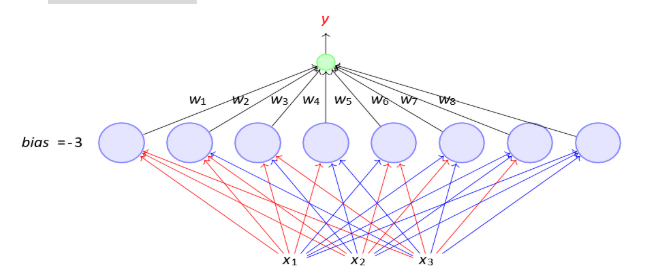


#### Find respective weights w1 to w8) and demonstrate for all the possible boolean functions for three inputs.


*Summary: Universal Approximation theorem: A MLP with a single hidden layer can represent any boolean function*.


In [6]:
import numpy as np

# Step activation
def step(x):
    return 1 if x >= 0 else 0


# Hidden layer: fires for exactly one input pattern
def hidden_layer(x):
    patterns = [
        [0,0,0], [0,0,1], [0,1,0], [0,1,1],
        [1,0,0], [1,0,1], [1,1,0], [1,1,1]
    ]

    h = []
    for p in patterns:
        w = [1 if pi == 1 else -1 for pi in p]
        h.append(step(np.dot(w, x) - 3))
    return np.array(h)


# MLP forward pass
def mlp(x, w_out):
    h = hidden_layer(x)
    return step(np.dot(w_out, h) - 0.5)


# All 3-input combinations
inputs = [
    [0,0,0], [0,0,1], [0,1,0], [0,1,1],
    [1,0,0], [1,0,1], [1,1,0], [1,1,1]
]

# Example Boolean function: XOR of 3 inputs
# Truth table: 1 if odd number of 1s
w_out = np.array([0,1,1,0,1,0,0,1])

print("3-input XOR Function:\n")
for x in inputs:
    print(f"Input {x} → Output {mlp(x, w_out)}")


3-input XOR Function:

Input [0, 0, 0] → Output 0
Input [0, 0, 1] → Output 0
Input [0, 1, 0] → Output 0
Input [0, 1, 1] → Output 0
Input [1, 0, 0] → Output 0
Input [1, 0, 1] → Output 0
Input [1, 1, 0] → Output 0
Input [1, 1, 1] → Output 1


#### 9. Implement an MLP by varying bias, weights, and learning rate, and record observations for different learning rate values. Plot a graph showing the relationship between loss (error) and learning rate.


Learning Rate: 0.001, Final Loss: 0.2625
Learning Rate: 0.01, Final Loss: 0.2482
Learning Rate: 0.1, Final Loss: 0.1779
Learning Rate: 0.5, Final Loss: 0.1680
Learning Rate: 1.0, Final Loss: 0.1673


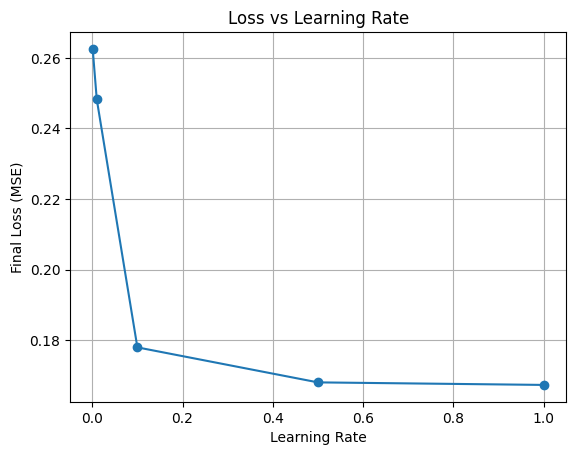

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid and derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Train MLP for a given learning rate
def train_mlp(lr, epochs=5000):
    np.random.seed(1)

    # Initialize weights and biases
    W1 = np.random.randn(2, 2)
    b1 = np.random.randn(1, 2)
    W2 = np.random.randn(2, 1)
    b2 = np.random.randn(1, 1)

    for _ in range(epochs):
        # Forward pass
        h = sigmoid(np.dot(X, W1) + b1)
        y_pred = sigmoid(np.dot(h, W2) + b2)

        # Loss (MSE)
        loss = np.mean((y - y_pred) ** 2)

        # Backpropagation
        d_output = (y - y_pred) * sigmoid_derivative(y_pred)
        d_hidden = d_output.dot(W2.T) * sigmoid_derivative(h)

        # Update weights and biases
        W2 += lr * h.T.dot(d_output)
        b2 += lr * np.sum(d_output, axis=0, keepdims=True)
        W1 += lr * X.T.dot(d_hidden)
        b1 += lr * np.sum(d_hidden, axis=0, keepdims=True)

    return loss


# Learning rates to test
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
losses = []

for lr in learning_rates:
    loss = train_mlp(lr)
    losses.append(loss)
    print(f"Learning Rate: {lr}, Final Loss: {loss:.4f}")

# Plot Loss vs Learning Rate
plt.plot(learning_rates, losses, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Final Loss (MSE)")
plt.title("Loss vs Learning Rate")
plt.grid(True)
plt.show()


#### 10. Implement an MLP using the Gradient Descent algorithm, and analyze the convergence behavior and performance of the network.


In [10]:
import numpy as np

class MLP:
    def __init__(self, lr=0.1, epochs=10000):
        self.lr = lr
        self.epochs = epochs

        # Weights initialization
        self.W1 = np.random.randn(2, 2)
        self.b1 = np.zeros((1, 2))
        self.W2 = np.random.randn(2, 1)
        self.b2 = np.zeros((1, 1))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, a):
        return a * (1 - a)

    def fit(self, X, y):
        losses = []

        for epoch in range(self.epochs):
            # -------- Forward Pass --------
            z1 = np.dot(X, self.W1) + self.b1
            a1 = self.sigmoid(z1)

            z2 = np.dot(a1, self.W2) + self.b2
            y_hat = self.sigmoid(z2)

            # -------- Loss --------
            loss = np.mean((y - y_hat) ** 2)
            losses.append(loss)

            # -------- Backpropagation --------
            error_output = y_hat - y
            delta_output = error_output * self.sigmoid_derivative(y_hat)

            error_hidden = np.dot(delta_output, self.W2.T)
            delta_hidden = error_hidden * self.sigmoid_derivative(a1)

            # -------- Gradient Descent Update --------
            self.W2 -= self.lr * np.dot(a1.T, delta_output)
            self.b2 -= self.lr * np.sum(delta_output, axis=0, keepdims=True)

            self.W1 -= self.lr * np.dot(X.T, delta_hidden)
            self.b1 -= self.lr * np.sum(delta_hidden, axis=0, keepdims=True)

            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

        return losses

    def predict(self, X):
        a1 = self.sigmoid(np.dot(X, self.W1) + self.b1)
        y_hat = self.sigmoid(np.dot(a1, self.W2) + self.b2)
        return (y_hat >= 0.5).astype(int)


In [11]:
# XOR dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

mlp = MLP(lr=0.1, epochs=10000)
losses = mlp.fit(X, y)

predictions = mlp.predict(X)

print("\nPredictions:")
for xi, yi, pi in zip(X, y, predictions):
    print(f"{xi} -> Target: {yi[0]}, Predicted: {pi[0]}")


Epoch 0, Loss: 0.2730
Epoch 1000, Loss: 0.2308
Epoch 2000, Loss: 0.1867
Epoch 3000, Loss: 0.1585
Epoch 4000, Loss: 0.1228
Epoch 5000, Loss: 0.0326
Epoch 6000, Loss: 0.0131
Epoch 7000, Loss: 0.0076
Epoch 8000, Loss: 0.0052
Epoch 9000, Loss: 0.0039

Predictions:
[0 0] -> Target: 0, Predicted: 0
[0 1] -> Target: 1, Predicted: 1
[1 0] -> Target: 1, Predicted: 1
[1 1] -> Target: 0, Predicted: 0
